In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from feature_engine.outliers import OutlierTrimmer
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_colwidth', -1)  # or 199

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

## concat data 

In [2]:
df_stroke = pd.read_csv('Strok_Clean.csv')
df_stroke

,rowID,patientAge,patientSexName,smoking,narcotic,exercise,alcohol,vital_bmi,vital_hr,vital_pulse,vital_temperature,vital_rr,vital_bps,vital_bpd,BUN,Cholesterol,Creatinine,FBS,LDL-Cholesterol,Triglyceride,Sodium,Potassium,Chloride,CO2,HCT,WBC,RBC,PLT,Neutrophil,Lymphocytes,Monocytes,Eosinophil,Basophil,MCV,MCH,MCHC,Hypertension,Hyperlipidaemia,Diabetes_Mellitus,Hemiplegia,Chronic_kidney,Atrial_fibrillation,Hypokalemia,stroke,Age_R,health_level,LDL_level
0,7629,57,1.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0,0,0,0,1,55-59,NaN,NaN
1,94691,83,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,1,75+,NaN,NaN
2,18029,60,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,1,60-64,NaN,NaN
3,1572858,63,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,60-64,NaN,NaN
4,295810,81,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0,1,75+,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72284,7522927,64,1.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0,1,60-64,NaN,NaN
72285,7522949,65,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0,0,0,0,1,65-69,NaN,NaN
72286,7563561,56,1.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,1,55-59,NaN,NaN
72287,7515954,65,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0,0,0,0,1,65-69,NaN,NaN


In [3]:
df_non_stroke = pd.read_csv('Non_Strok_Clean.csv')
df_non_stroke

,rowID,patientAge,patientSexName,smoking,narcotic,exercise,alcohol,vital_bmi,vital_hr,vital_pulse,vital_temperature,vital_rr,vital_bps,vital_bpd,FBS,Creatinine,Cholesterol,Triglyceride,LDL-Cholesterol,Potassium,HCT,RBC,WBC,BUN,Sodium,Chloride,CO2,MCV,PLT,Neutrophil,Lymphocytes,Monocytes,Eosinophil,Basophil,MCH,MCHC,Hypertension,Hyperlipidaemia,Diabetes_Mellitus,Hemiplegia,Chronic_kidney,Atrial_fibrillation,Hypokalemia,stroke,Age_R,health_level,LDL_level
0,1078095,61,0.0,NaN,NaN,NaN,NaN,23.571,80.0,72.0,36.5,20.0,125.0,70.0,75.0,12.45,169.0,119.0,113.0,4.43,40.3,4.47,5.3,NaN,138.0,93.0,19.5,90.2,309.0,65.7,19.2,8.0,6.5,0.6,29.1,32.3,0,0,0,0,0,0,0,0,60-64,overweight,close to normal
1,280095,40,1.0,NaN,NaN,NaN,NaN,22.663,80.0,79.0,36.5,20.0,135.0,84.0,81.0,17.20,200.0,110.0,140.0,6.49,20.6,2.72,11.1,116.2,142.0,98.0,17.2,75.7,374.0,68.2,21.1,4.5,5.6,0.6,24.3,32.0,0,0,0,0,0,0,0,0,40-44,healthy,quite high
2,502579,67,1.0,NaN,NaN,NaN,NaN,19.310,80.0,77.0,36.5,20.0,146.0,76.0,100.0,9.28,160.0,172.0,92.0,4.42,35.5,3.98,7.9,37.2,139.0,97.0,21.7,89.2,218.0,42.2,25.3,4.2,27.7,0.6,29.9,33.5,0,0,0,0,0,0,0,0,65-69,healthy,normal
3,246375,66,1.0,NaN,NaN,NaN,NaN,22.305,80.0,52.0,36.5,20.0,99.0,58.0,85.0,9.84,127.0,64.0,93.0,3.86,29.5,3.50,4.2,80.7,137.0,98.0,21.9,84.3,133.0,61.2,19.8,10.5,8.3,0.2,26.9,31.9,1,0,0,0,0,0,0,0,65-69,healthy,normal
4,1923337,64,0.0,0.0,NaN,NaN,0.0,20.202,80.0,97.0,37.0,20.0,139.0,91.0,118.0,0.60,201.0,91.0,131.0,4.40,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,60-64,healthy,quite high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58994,7522990,51,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,50-54,NaN,NaN
58995,7545314,79,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,1,0,0,75+,NaN,NaN
58996,7515974,74,1.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0,0,70-74,NaN,NaN
58997,7545308,79,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,1,0,0,75+,NaN,NaN


In [4]:
df_stroke.columns

Index(['rowID', 'patientAge', 'patientSexName', 'smoking', 'narcotic',
       'exercise', 'alcohol', 'vital_bmi', 'vital_hr', 'vital_pulse',
       'vital_temperature', 'vital_rr', 'vital_bps', 'vital_bpd', 'BUN',
       'Cholesterol', 'Creatinine', 'FBS', 'LDL-Cholesterol', 'Triglyceride',
       'Sodium', 'Potassium', 'Chloride', 'CO2', 'HCT', 'WBC', 'RBC', 'PLT',
       'Neutrophil', 'Lymphocytes', 'Monocytes', 'Eosinophil', 'Basophil',
       'MCV', 'MCH', 'MCHC', 'Hypertension', 'Hyperlipidaemia',
       'Diabetes_Mellitus', 'Hemiplegia', 'Chronic_kidney',
       'Atrial_fibrillation', 'Hypokalemia', 'stroke', 'Age_R', 'health_level',
       'LDL_level'],
      dtype='object')

In [5]:
df_stroke.isna().sum()

rowID                      0
patientAge                 0
patientSexName          2437
smoking                52072
narcotic               61016
exercise               68867
alcohol                52700
vital_bmi               9393
vital_hr                   0
vital_pulse                0
vital_temperature          0
vital_rr                   0
vital_bps                  0
vital_bpd                  0
BUN                    63343
Cholesterol            64045
Creatinine             56257
FBS                    56671
LDL-Cholesterol        60821
Triglyceride           62938
Sodium                 64838
Potassium              63158
Chloride               66399
CO2                    64483
HCT                    63867
WBC                    68121
RBC                    65047
PLT                    68059
Neutrophil             65591
Lymphocytes            65591
Monocytes              65610
Eosinophil             65677
Basophil               66800
MCV                    64921
MCH           

In [6]:
df_non_stroke.columns

Index(['rowID', 'patientAge', 'patientSexName', 'smoking', 'narcotic',
       'exercise', 'alcohol', 'vital_bmi', 'vital_hr', 'vital_pulse',
       'vital_temperature', 'vital_rr', 'vital_bps', 'vital_bpd', 'FBS',
       'Creatinine', 'Cholesterol', 'Triglyceride', 'LDL-Cholesterol',
       'Potassium', 'HCT', 'RBC', 'WBC', 'BUN', 'Sodium', 'Chloride', 'CO2',
       'MCV', 'PLT', 'Neutrophil', 'Lymphocytes', 'Monocytes', 'Eosinophil',
       'Basophil', 'MCH', 'MCHC', 'Hypertension', 'Hyperlipidaemia',
       'Diabetes_Mellitus', 'Hemiplegia', 'Chronic_kidney',
       'Atrial_fibrillation', 'Hypokalemia', 'stroke', 'Age_R', 'health_level',
       'LDL_level'],
      dtype='object')

In [7]:
df = pd.concat([df_stroke,df_non_stroke])
df

,rowID,patientAge,patientSexName,smoking,narcotic,exercise,alcohol,vital_bmi,vital_hr,vital_pulse,vital_temperature,vital_rr,vital_bps,vital_bpd,BUN,Cholesterol,Creatinine,FBS,LDL-Cholesterol,Triglyceride,Sodium,Potassium,Chloride,CO2,HCT,WBC,RBC,PLT,Neutrophil,Lymphocytes,Monocytes,Eosinophil,Basophil,MCV,MCH,MCHC,Hypertension,Hyperlipidaemia,Diabetes_Mellitus,Hemiplegia,Chronic_kidney,Atrial_fibrillation,Hypokalemia,stroke,Age_R,health_level,LDL_level
0,7629,57,1.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0,0,0,0,1,55-59,NaN,NaN
1,94691,83,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,1,75+,NaN,NaN
2,18029,60,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,1,60-64,NaN,NaN
3,1572858,63,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,60-64,NaN,NaN
4,295810,81,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0,1,75+,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58994,7522990,51,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,50-54,NaN,NaN
58995,7545314,79,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,1,0,0,75+,NaN,NaN
58996,7515974,74,1.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0,0,70-74,NaN,NaN
58997,7545308,79,0.0,NaN,NaN,NaN,NaN,NaN,80.0,80.0,37.0,20.0,120.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,1,0,0,75+,NaN,NaN


In [8]:
df.isna().sum()

rowID                       0
patientAge                  0
patientSexName           2438
smoking                 73208
narcotic               103430
exercise               110571
alcohol                 74270
vital_bmi               12262
vital_hr                    0
vital_pulse                 0
vital_temperature           0
vital_rr                    0
vital_bps                   0
vital_bpd                   0
BUN                     94283
Cholesterol             68303
Creatinine              58190
FBS                     64418
LDL-Cholesterol         63525
Triglyceride            71809
Sodium                  90270
Potassium               65108
Chloride                94399
CO2                     90107
HCT                     80737
WBC                    108074
RBC                    102248
PLT                    108017
Neutrophil             103900
Lymphocytes            103899
Monocytes              103976
Eosinophil             104056
Basophil               107032
MCV       

In [9]:
# # drop na each columns
# df_dn = df.dropna(subset=['patientSexName','smoking','alcohol','exercise','vital_bmi'])

In [10]:
# # drop na each columns
# df_dn = df.dropna(subset=['patientSexName'])

In [11]:
# df_dn = df

In [12]:
df_dn = df.dropna(subset=['patientSexName','smoking','alcohol','vital_bmi'])

In [13]:
# df_dn = df.dropna(subset=['patientSexName','vital_bmi'])

In [14]:
df_dn['stroke'].value_counts()

0    36221
1    18934
Name: stroke, dtype: int64

In [15]:
df_dn

,rowID,patientAge,patientSexName,smoking,narcotic,exercise,alcohol,vital_bmi,vital_hr,vital_pulse,vital_temperature,vital_rr,vital_bps,vital_bpd,BUN,Cholesterol,Creatinine,FBS,LDL-Cholesterol,Triglyceride,Sodium,Potassium,Chloride,CO2,HCT,WBC,RBC,PLT,Neutrophil,Lymphocytes,Monocytes,Eosinophil,Basophil,MCV,MCH,MCHC,Hypertension,Hyperlipidaemia,Diabetes_Mellitus,Hemiplegia,Chronic_kidney,Atrial_fibrillation,Hypokalemia,stroke,Age_R,health_level,LDL_level
114,2077043,39,1.0,1.0,NaN,NaN,0.0,23.140,80.0,70.0,36.0,20.0,129.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,35-39,overweight,NaN
115,5093800,63,1.0,0.0,NaN,NaN,1.0,27.682,80.0,80.0,36.9,18.0,136.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,60-64,obese 1,NaN
119,6560756,83,0.0,0.0,0.0,1.0,0.0,23.962,80.0,55.0,36.5,20.0,132.0,70.0,NaN,NaN,NaN,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0,0,1,0,1,75+,overweight,NaN
132,648208,66,0.0,0.0,0.0,NaN,0.0,24.445,80.0,80.0,36.5,20.0,143.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1,65-69,overweight,NaN
139,1583954,59,1.0,0.0,0.0,NaN,0.0,17.264,87.0,87.0,0.0,20.0,95.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0,1,55-59,underweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58977,7592574,72,0.0,0.0,0.0,NaN,0.0,28.363,80.0,69.0,36.5,20.0,156.0,76.0,18.6,224.0,0.70,109.0,NaN,67.0,140.0,3.96,104.0,26.0,35.0,5.40,3.93,211.0,64.8,23.5,5.4,5.2,1.1,89.1,29.3,32.9,1,0,0,0,0,0,0,0,70-74,obese 1,NaN
58980,7589648,62,0.0,0.0,NaN,NaN,0.0,26.898,80.0,92.0,36.5,20.0,154.0,90.0,NaN,188.0,0.82,120.0,108.0,138.0,NaN,4.60,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,60-64,obese 1,close to normal
58981,7595099,64,0.0,0.0,0.0,NaN,0.0,31.333,80.0,66.0,35.2,0.0,187.0,69.0,35.7,171.0,2.11,214.0,101.0,126.0,136.0,5.05,106.0,22.2,32.8,5.90,3.83,114.0,62.2,29.3,4.6,3.4,0.5,85.6,26.1,30.5,1,1,0,0,1,0,0,0,60-64,obese 2,close to normal
58984,7589985,63,1.0,0.0,NaN,NaN,0.0,24.394,80.0,69.0,36.6,20.0,130.0,75.0,15.0,199.0,0.90,114.0,112.0,59.0,139.0,4.40,101.0,32.0,45.2,3.52,5.19,195.0,73.9,19.7,5.8,0.4,0.2,87.1,30.1,34.5,0,0,0,0,0,0,0,0,60-64,overweight,close to normal


<AxesSubplot:>

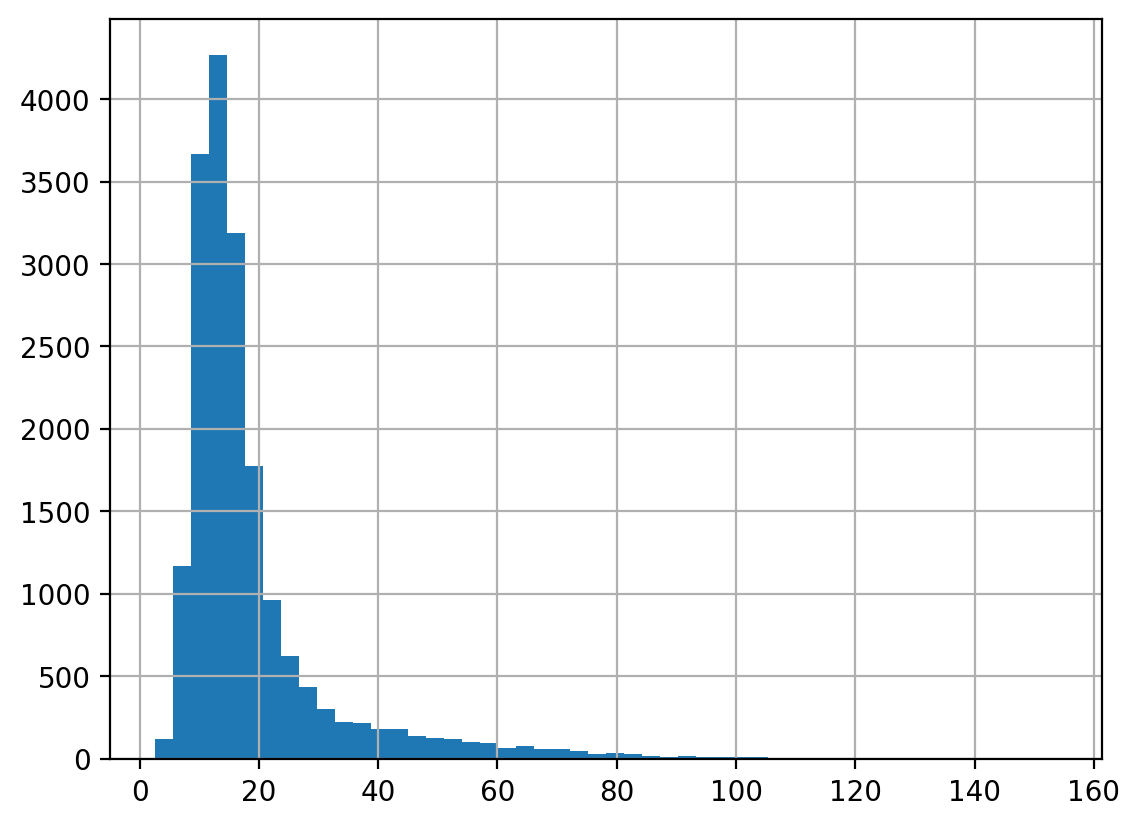

In [16]:
df_dn.BUN.hist(bins = 50)

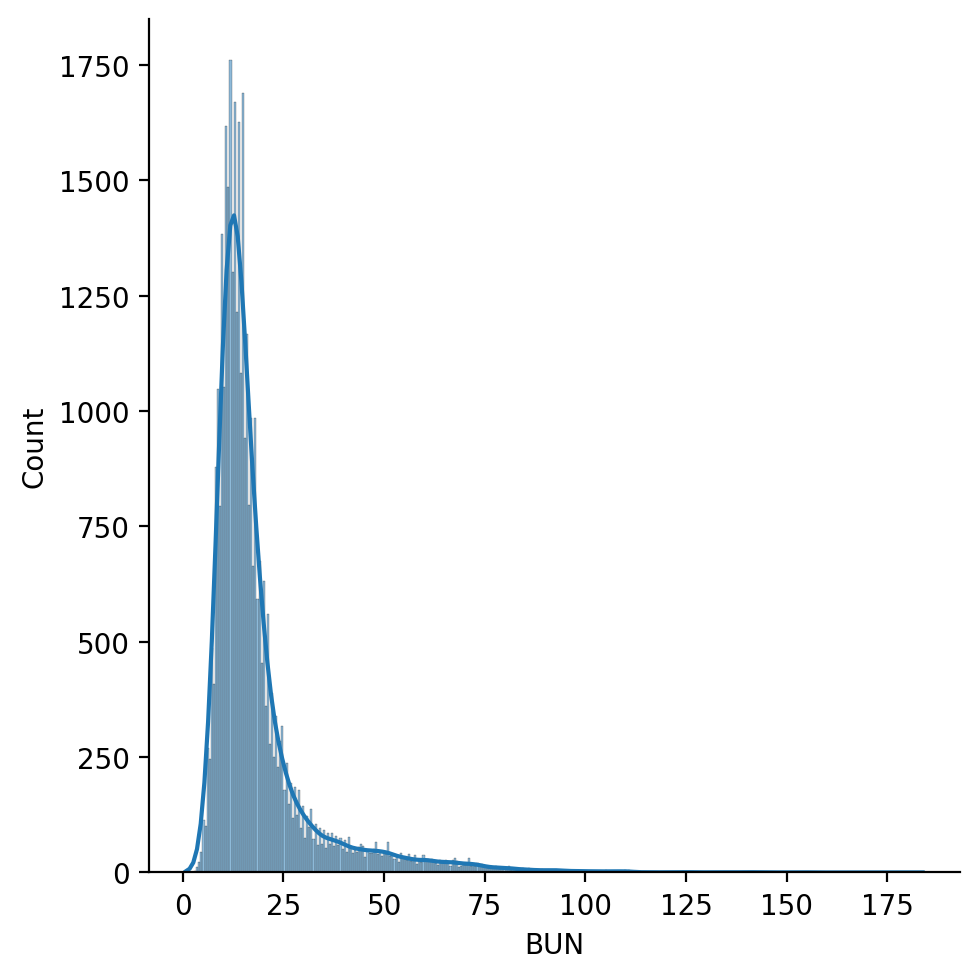

In [17]:
sns.displot(df['BUN'] , kde = True);

In [18]:
df_dn.isna().sum()

rowID                      0
patientAge                 0
patientSexName             0
smoking                    0
narcotic               29318
exercise               37542
alcohol                    0
vital_bmi                  0
vital_hr                   0
vital_pulse                0
vital_temperature          0
vital_rr                   0
vital_bps                  0
vital_bpd                  0
BUN                    36812
Cholesterol            18662
Creatinine             13666
FBS                    17049
LDL-Cholesterol        15240
Triglyceride           15806
Sodium                 36695
Potassium              15744
Chloride               36929
CO2                    36783
HCT                    24332
WBC                    43149
RBC                    42907
PLT                    43085
Neutrophil             43851
Lymphocytes            43850
Monocytes              43851
Eosinophil             43851
Basophil               43857
MCV                    43029
MCH           

In [19]:
# drop columns ที่มีค่า missing values เยอะ ๆ 
df_dn.drop(['narcotic','BUN','Sodium','Chloride','CO2','WBC','RBC','PLT','Neutrophil',
            'Lymphocytes','Monocytes','Eosinophil','Basophil','MCV','MCH','MCHC','exercise'], axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6768\274096706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dn.drop(['narcotic','BUN','Sodium','Chloride','CO2','WBC','RBC','PLT','Neutrophil',


## ตัด Outlier

In [20]:
df_dn

,rowID,patientAge,patientSexName,smoking,alcohol,vital_bmi,vital_hr,vital_pulse,vital_temperature,vital_rr,vital_bps,vital_bpd,Cholesterol,Creatinine,FBS,LDL-Cholesterol,Triglyceride,Potassium,HCT,Hypertension,Hyperlipidaemia,Diabetes_Mellitus,Hemiplegia,Chronic_kidney,Atrial_fibrillation,Hypokalemia,stroke,Age_R,health_level,LDL_level
114,2077043,39,1.0,1.0,0.0,23.140,80.0,70.0,36.0,20.0,129.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,35-39,overweight,NaN
115,5093800,63,1.0,0.0,1.0,27.682,80.0,80.0,36.9,18.0,136.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,60-64,obese 1,NaN
119,6560756,83,0.0,0.0,0.0,23.962,80.0,55.0,36.5,20.0,132.0,70.0,NaN,NaN,116.0,NaN,NaN,NaN,NaN,1,1,1,0,0,1,0,1,75+,overweight,NaN
132,648208,66,0.0,0.0,0.0,24.445,80.0,80.0,36.5,20.0,143.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1,65-69,overweight,NaN
139,1583954,59,1.0,0.0,0.0,17.264,87.0,87.0,0.0,20.0,95.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0,1,55-59,underweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58977,7592574,72,0.0,0.0,0.0,28.363,80.0,69.0,36.5,20.0,156.0,76.0,224.0,0.70,109.0,NaN,67.0,3.96,35.0,1,0,0,0,0,0,0,0,70-74,obese 1,NaN
58980,7589648,62,0.0,0.0,0.0,26.898,80.0,92.0,36.5,20.0,154.0,90.0,188.0,0.82,120.0,108.0,138.0,4.60,43.0,0,0,0,0,0,0,0,0,60-64,obese 1,close to normal
58981,7595099,64,0.0,0.0,0.0,31.333,80.0,66.0,35.2,0.0,187.0,69.0,171.0,2.11,214.0,101.0,126.0,5.05,32.8,1,1,0,0,1,0,0,0,60-64,obese 2,close to normal
58984,7589985,63,1.0,0.0,0.0,24.394,80.0,69.0,36.6,20.0,130.0,75.0,199.0,0.90,114.0,112.0,59.0,4.40,45.2,0,0,0,0,0,0,0,0,60-64,overweight,close to normal


In [21]:
df_dn.isna().sum()

rowID                      0
patientAge                 0
patientSexName             0
smoking                    0
alcohol                    0
vital_bmi                  0
vital_hr                   0
vital_pulse                0
vital_temperature          0
vital_rr                   0
vital_bps                  0
vital_bpd                  0
Cholesterol            18662
Creatinine             13666
FBS                    17049
LDL-Cholesterol        15240
Triglyceride           15806
Potassium              15744
HCT                    24332
Hypertension               0
Hyperlipidaemia            0
Diabetes_Mellitus          0
Hemiplegia                 0
Chronic_kidney             0
Atrial_fibrillation        0
Hypokalemia                0
stroke                     0
Age_R                      6
health_level               0
LDL_level              15240
dtype: int64

<AxesSubplot:>

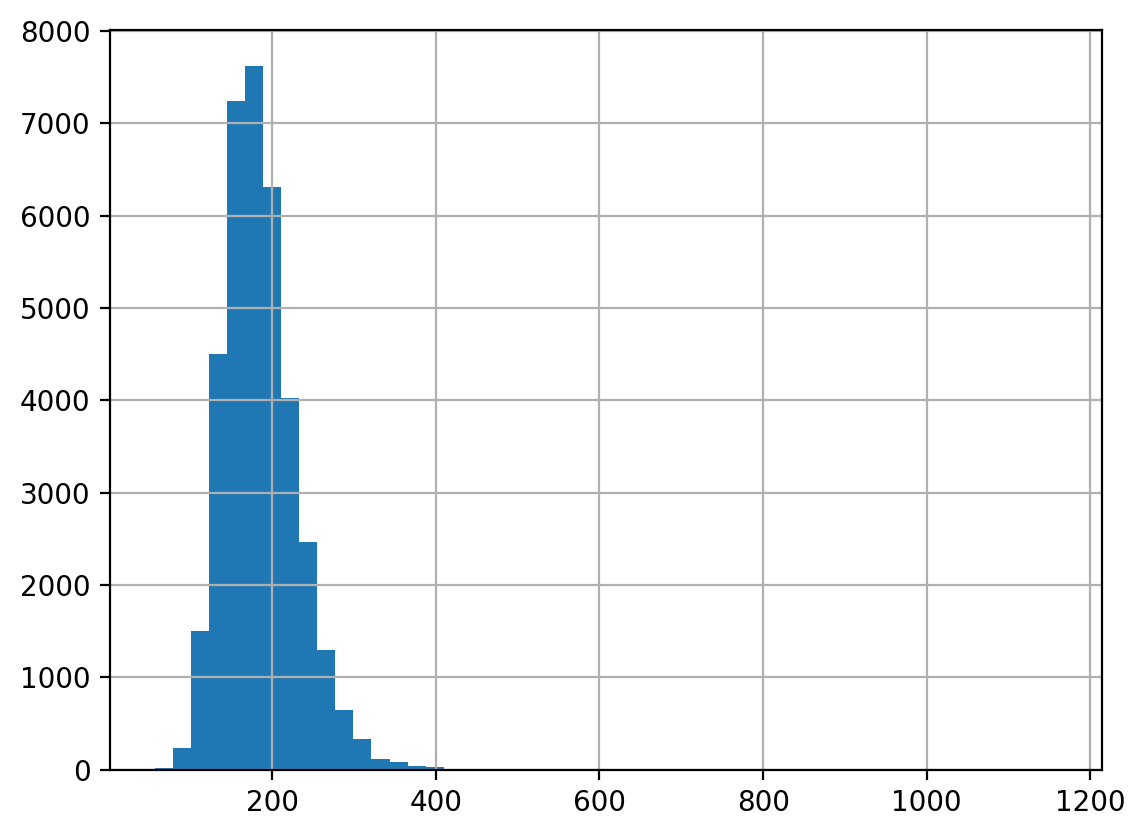

In [22]:
df_dn.Cholesterol.hist(bins = 50)

<AxesSubplot:>

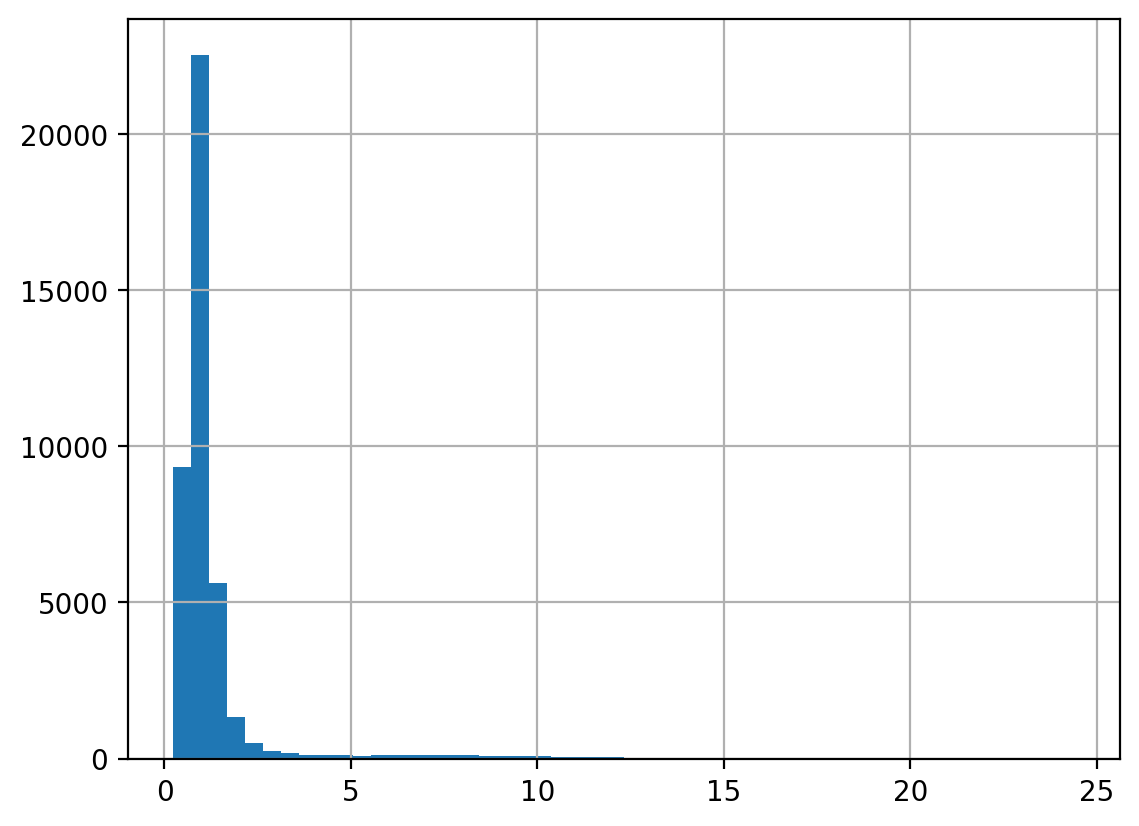

In [23]:
df_dn.Creatinine.hist(bins = 50)

<AxesSubplot:>

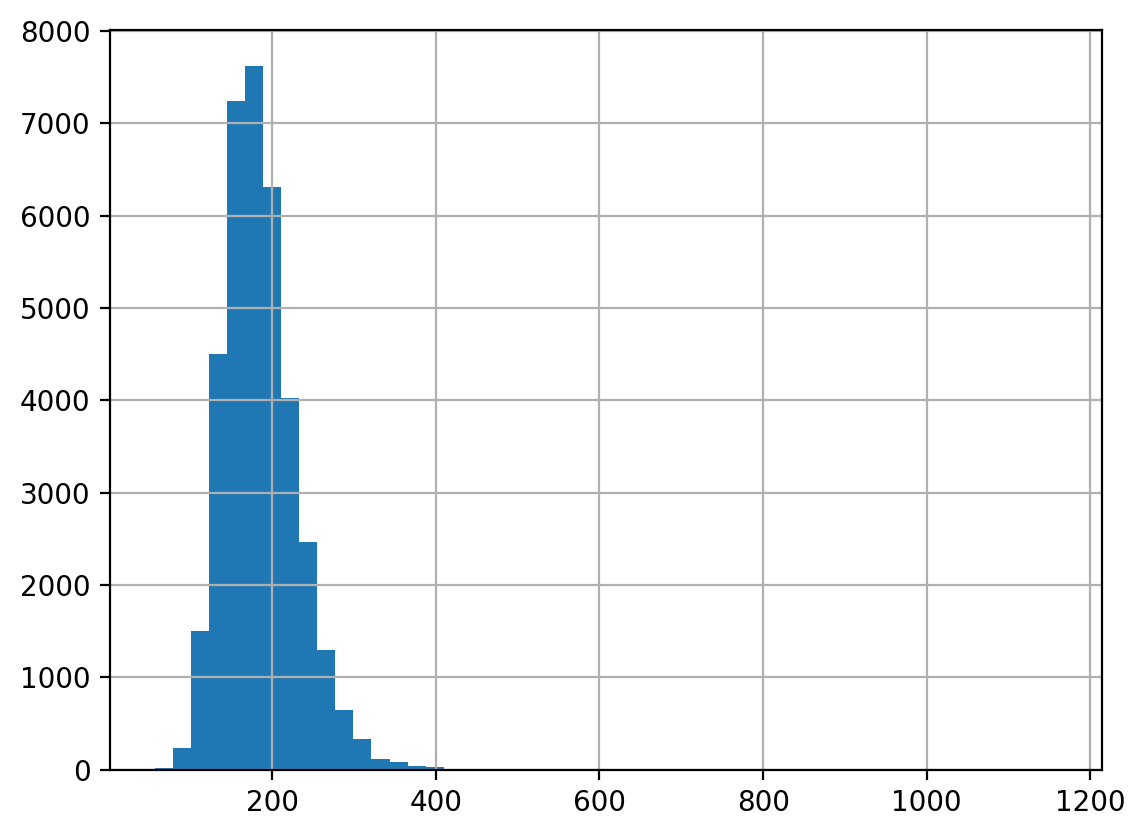

In [24]:
df_dn.Cholesterol.hist(bins = 50)

<AxesSubplot:>

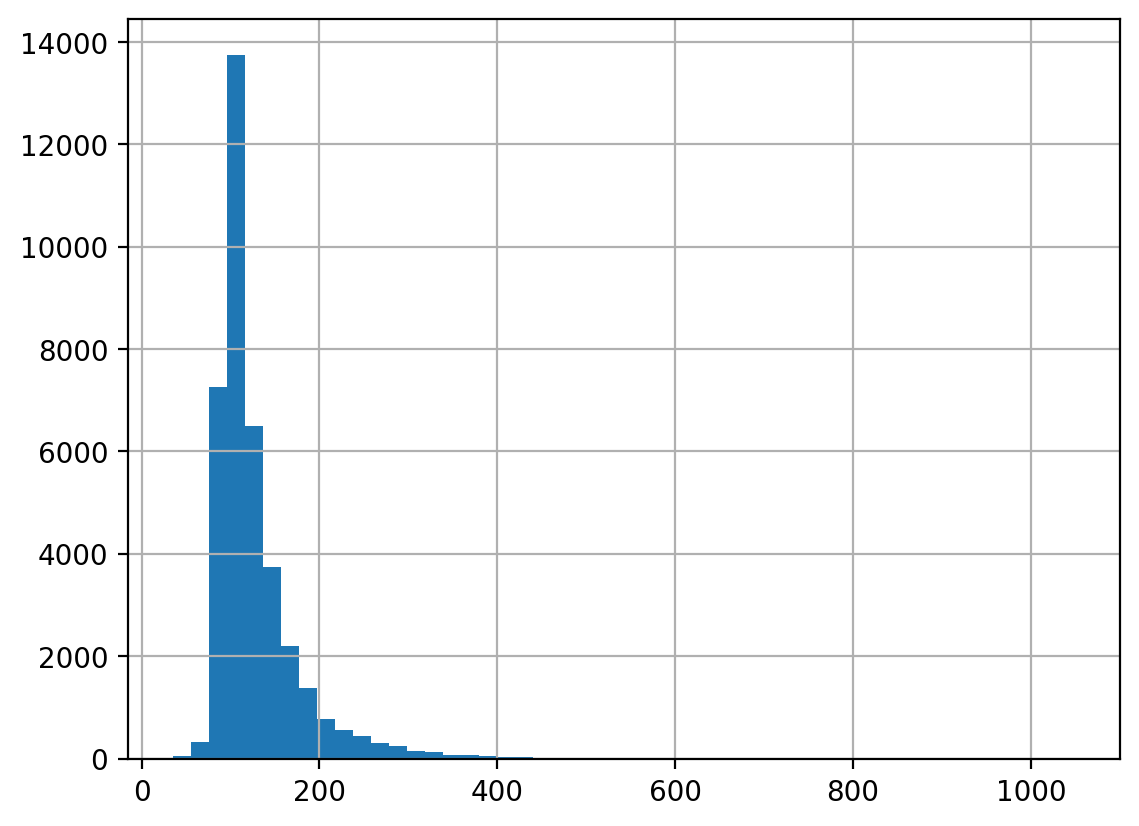

In [25]:
df_dn.FBS.hist(bins = 50)

<AxesSubplot:>

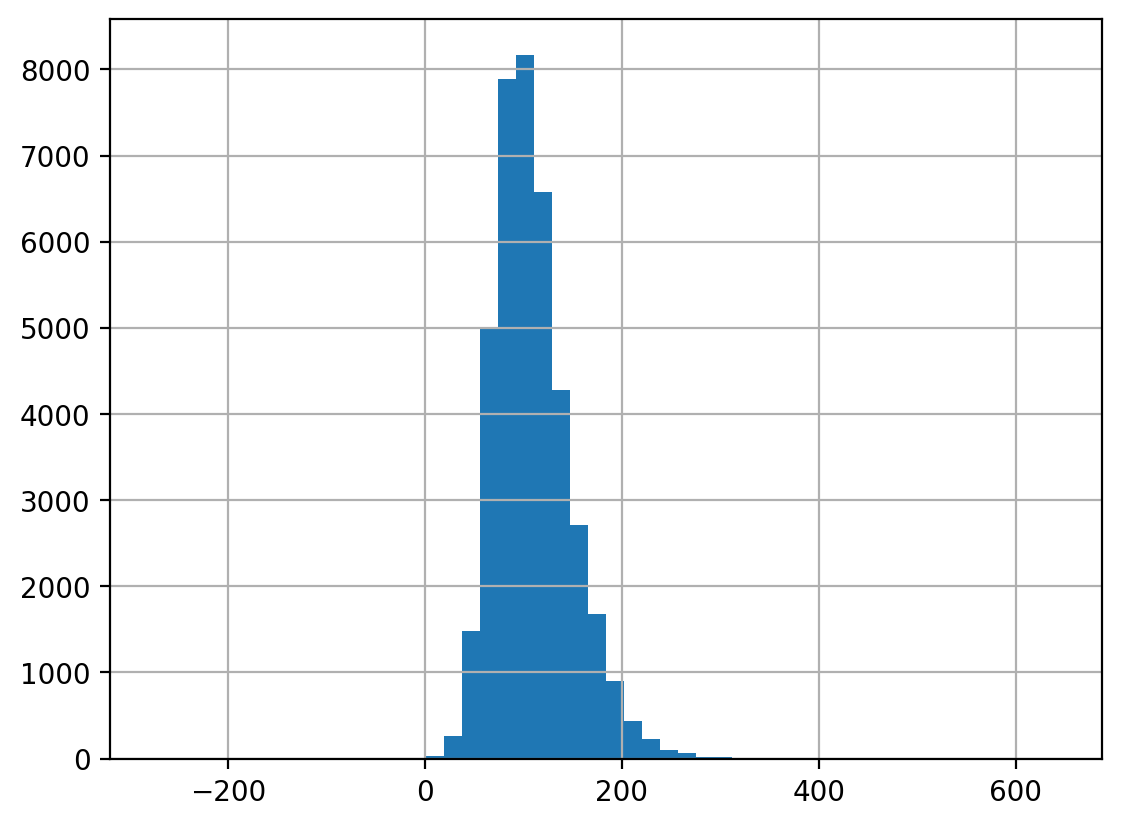

In [26]:
df_dn['LDL-Cholesterol'].hist(bins = 50)

In [ ]:
df_dn['LDL-Cholesterol'].max()

In [ ]:
df_dn[df_dn['LDL-Cholesterol'] <1]

In [ ]:
# p.Guy method
# temp = df_dn.loc[:,'LDL-Cholesterol']
# capper = OutlierTrimmer(capping_method ='quantiles', tail='both', fold = 0.05, variables =None, missing_values='ignore')
# capper.fit(pd.DataFrame(temp))
# temp = capper.transform(pd.DataFrame(temp))
# temp

In [ ]:
# ตัด outier ของ LDL-Cholesterol
trimmer = OutlierTrimmer(variables= 'LDL-Cholesterol', capping_method= 'quantiles', tail='left', 
                         fold=0.01 ,missing_values='ignore')
df_dn = trimmer.fit_transform(df_dn)

In [ ]:
df_dn['LDL-Cholesterol'].max()

In [ ]:
df_dn['stroke'].value_counts()

In [ ]:
df_dn

In [ ]:
df_dn['LDL-Cholesterol'].hist(bins = 50)

In [ ]:
# df_dn.drop(df_dn[df_dn['LDL-Cholesterol'] < 10].index ,inplace = True)

In [ ]:
df_dn.Triglyceride.hist(bins = 50)

In [ ]:
df_dn['Triglyceride'].min()

In [ ]:
T = df_dn[df_dn['Triglyceride'] < 30]

In [ ]:
T['stroke'].value_counts()

In [ ]:
df_dn[df_dn['Triglyceride'] > 2900]

In [ ]:
df_dn.drop(df_dn[df_dn['Triglyceride'] > 2900].index ,inplace = True)

In [ ]:
df_dn.drop(df_dn[df_dn['Triglyceride'] < 30].index ,inplace = True)

In [ ]:
asasas

In [ ]:
df_dn['stroke'].value_counts()

In [ ]:
# # ตัด outier ของ LDL-Cholesterol
# trimmer = OutlierTrimmer(variables= 'Triglyceride', capping_method= 'quantiles', tail='both', 
#                          fold=0.001 ,missing_values='ignore')
# df_dn = trimmer.fit_transform(df_dn)

In [ ]:
# # ตัด outier ของ LDL-Cholesterol
# trimmer = OutlierTrimmer(variables= 'Triglyceride', capping_method= 'quantiles', tail='left', 
#                          fold=0.001 ,missing_values='ignore')
# df_dn = trimmer.fit_transform(df_dn)

In [ ]:
df_dn

In [ ]:
df_dn['stroke'].value_counts()

In [ ]:
df_dn.Potassium.hist(bins = 50)

In [ ]:
df_dn.drop(df_dn[df_dn['patientAge'] < 18].index ,inplace = True)

In [ ]:
df_dn.HCT.hist(bins = 50)

In [ ]:
df_dn.isna().sum()

In [ ]:
df_dn['stroke'].value_counts()

## ลองตัดค่า null ของคนที่ไม่เป็นโรค 

In [ ]:
non = df_dn[df_dn['stroke']==0]
non

In [ ]:
non.isna().sum()

In [ ]:
non = non.dropna()
non

In [ ]:
non.describe()

In [ ]:
stroke = df_dn[df_dn['stroke'] ==1 ]
stroke

In [ ]:
stroke.isna().sum()

In [ ]:
stroke['HCT'].min()

In [ ]:
stroke[stroke['HCT'] < 50]

In [ ]:
asasas

In [ ]:
# stroke = stroke.dropna(subset=['exercise'])

In [ ]:
stroke

In [ ]:
stroke.isna().sum()

In [ ]:
df_a = pd.concat([stroke,non])
df_a

In [ ]:
df_a.isna().sum()

In [ ]:
ฟหฟหฟห

In [ ]:
# impute

In [ ]:
from sklearn.impute import KNNImputer
df_subset = stroke.drop(['Creatinine','Cholesterol','FBS','Triglyceride','Potassium','HCT'],axis=1)
df_subset

In [ ]:
# choose col for impute nan
col_ = stroke[['rowID','Creatinine','Cholesterol','FBS','Triglyceride','Potassium','HCT']]
col_

In [ ]:
%%time
imputer = KNNImputer(n_neighbors=5)
df_ = pd.DataFrame(imputer.fit_transform(col_), columns=col_.columns)
df_

In [ ]:
stroke = pd.merge(df_subset,df_ ,how= "left", left_on= "rowID", right_on="rowID")
stroke

In [ ]:
# stroke = stroke.dropna()
# stroke

In [ ]:
stroke.isna().sum()

In [ ]:
df = pd.concat([stroke,non])
df

In [ ]:
# ใส่ค่า Default ของเเต่ละตัว
df['vital_hr'] = df['vital_hr'].replace(0,80)
df['vital_pulse'] = df['vital_pulse'].replace(0,80)
df['vital_temperature'] = df['vital_temperature'].replace(0,37.0)
df['vital_rr'] = df['vital_rr'].replace(0,20)
df['vital_bps'] = df['vital_bps'].replace(0,120)
df['vital_bpd'] = df['vital_bpd'].replace(0,80)

In [ ]:
df.describe()

In [ ]:
df['vital_temperature'].min()

In [ ]:
df.drop(df[df['vital_temperature'] < 30].index ,inplace = True)
df.drop(df[df['vital_temperature'] > 45].index ,inplace = True)

In [ ]:
df.describe()

In [ ]:
df.vital_rr.hist(bins = 50)

In [ ]:
df[df['vital_rr'] < 10]

In [ ]:
df.drop(df[df['vital_rr'] < 10].index ,inplace = True)

In [ ]:
df[df['vital_rr'] > 50]

In [ ]:
df.drop(df[df['vital_rr'] > 50].index ,inplace = True)

In [ ]:
df[df['vital_bpd'] < 10]

In [ ]:
df[df['vital_bpd'] > 150]

In [ ]:
df.drop(df[df['vital_bpd'] > 200].index ,inplace = True)

In [ ]:
df.drop(df[df['vital_bpd'] < 10].index ,inplace = True)

In [ ]:
df[df['vital_bps'] < 50]

In [ ]:
df.drop(df[df['vital_bps'] > 350].index ,inplace = True)

In [ ]:
df[df['vital_pulse'] > 250]

In [ ]:
df.drop(df[df['vital_pulse'] > 250].index ,inplace = True)

In [ ]:
df[df['vital_hr'] > 150]

In [ ]:
df[df['FBS'] < 10]

In [ ]:
df.drop(df[df['FBS'] < 10].index ,inplace = True)

In [ ]:
df.describe()

In [ ]:
df['stroke'].value_counts()

In [ ]:
df

In [ ]:
def a(x):
    age_range = ""
    if x == '18-24':
        age_range = '1'
    elif x == '25-30':
        age_range = '2'
    elif x == '30-34':
        age_range = '3'
    elif x == '35-39':
        age_range = '4'
    elif x == '40-44':
        age_range = '5'
    elif x == '45-49':
        age_range = '6'
    elif x == '50-54':
        age_range = '7'
    elif x == '55-59':
        age_range = '8'
    elif x == '60-64':
        age_range = '9'
    elif x == '65-69':
        age_range = '10'
    elif x == '70-74':
        age_range = '11'
    elif x == '75+':
        age_range = '12'
    return age_range
df['Age_R_e'] = df['Age_R'].apply(a)

In [ ]:
def b(x):
    health_level = ""
    if x == 'underweight' :
        health_level = '1'
    elif x == 'healthy':
        health_level = '2'
    elif x == 'overweight':
        health_level = '3'
    elif x == 'obese 1':
        health_level = '4'
    elif x== 'obese 2':
        health_level = '5'
    return health_level
df['health_level_e'] = df['health_level'].apply(b)

In [ ]:
def l(x):
    LDL_level = ""
    if x == 'normal' :
        LDL_level = '1'
    elif x == 'close to normal':
        LDL_level = '2'
    elif x == 'quite high':
        LDL_level = '3'
    elif x == 'high':
        LDL_level = '4'
    elif x== 'very high':
        LDL_level = '5'
    return LDL_level
df['LDL_level_e'] = df['LDL_level'].apply(l)

In [ ]:
df

In [ ]:
asasasas

In [ ]:
df.to_csv('stroke_model.csv', index= False)

## Analysis (ทำก่อน impute)

In [ ]:
# Total 17578 ราย

In [ ]:
df_a

In [ ]:
df_a['stroke'].value_counts()

In [ ]:
21722+4870

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='stroke', hue='stroke', data=(df_a))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
# df_dn['stroke'].value_counts().sort_values().plot.bar(color = 'Orange' , figsize = (5,3));

In [ ]:
df_a['patientSexName'].value_counts().sort_values().plot.bar(color = 'Blue' , figsize = (5,3));

In [ ]:
# x,y = 'patientSexName', 'stroke'
# df_1 = df_dn.groupby(x)[y].value_counts(normalize=True)
# df_1 = df_1.mul(100)
# df_1 = df_1.rename('percent').reset_index()
# df_1

In [ ]:
# g = sns.catplot(x='patientSexName',y='percent',hue='stroke',kind='bar',data=df_1)
# g.ax.set_ylim(0,100)
# for p in g.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x()
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='patientSexName', hue='stroke', data=(df_a))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Age_R', hue='stroke', data=df_a.sort_values('Age_R' , ascending = False))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Hypertension', hue='stroke', data=(df_a))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Hyperlipidaemia', hue='stroke', data=(df_a))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Diabetes_Mellitus', hue='stroke', data=(df_a))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Chronic_kidney', hue='stroke', data=(df_a))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Atrial_fibrillation', hue='stroke', data=(df_dn))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Hypokalemia', hue='stroke', data=(df_a))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='smoking', hue='stroke', data=(df_a))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='alcohol', hue='stroke', data=(df_a))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='health_level', hue='stroke', data=df_a.sort_values('health_level' , ascending = False))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Hemiplegia', hue='stroke', data=df_a.sort_values('Hemiplegia' , ascending = False))
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
# plt.style.use('seaborn-whitegrid')
# plt.figure(figsize=(5,5))
# ax = sns.countplot(x='exercise', hue='stroke', data=(df_a))
# for container in ax.containers:
#     ax.bar_label(container)

In [ ]:
df_a.isna().sum()